<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/GrowthAccounting-py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   year countrycode      rgdpna      rkna         pop         emp  \
0  1995         USA  11449898.0  0.519351  265.163745  127.462738   
1  1996         USA  11881846.0  0.539946  268.335003  129.357666   
2  1997         USA  12410257.0  0.563955  271.713635  132.362579   
3  1998         USA  12966412.0  0.591966  275.175301  134.500900   
4  1999         USA  13582736.0  0.623855  278.548150  136.756470   
5  2000         USA  14143361.0  0.655893  281.710909  138.636108   
6  2001         USA  14284560.0  0.681237  284.607993  138.646805   
7  2002         USA  14533353.0  0.700912  287.279318  138.152084   
8  2003         USA  14949183.0  0.720952  289.815562  138.690857   
9  2004         USA  15517086.0  0.743641  292.354658  140.270187   

           avh     labsh    rtfpna     alpha            y_n          hours  \
0  1817.474328  0.607377  0.864630  0.392623   89829.375000  231660.254131   
1  1823.520522  0.607116  0.872310  0.392884   91852.664062  235886.358648   
2  182

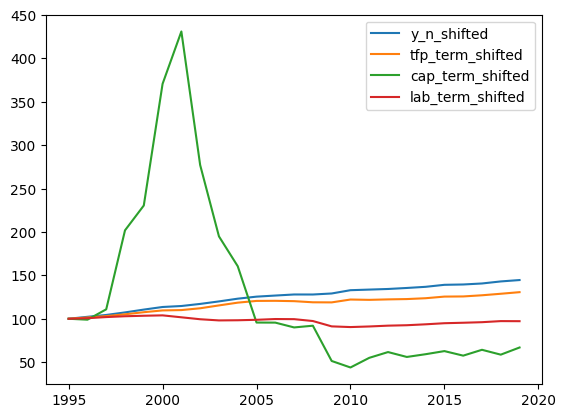

In [12]:
# Visual Studioで作業しようとしたところ
# ModuleNotFoundError: No module named 'pandas'
# ModuleNotFoundError: No module named 'matplotlib'
# というエラーが出た。環境にインストールされていないようなので
# pip install pandas
# pip install matplotlib
# 上記コマンドでインストールしたところ回避できた
import pandas as pd
import matplotlib.pyplot as plt


# Load data
pwt90 = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt90.dta')
# pwt10.01のデータを引っ張ってくる
# 9.0のパスと形式がだいぶ違うが大丈夫なのか不安
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
# dataをpwt1001に乗せ換える
# 期間を指示にあったサンプル期間 1995年～2019年に変更する
# 対象国は"France" "Germany" "Canada" "Italy" "Japan" "United Kingdom" "United States"
# 各国でデータが出力されることを確認したので"United States"でファイルを保存しておく

# data = pwt90.loc[pwt90['country'].isin(['United Kingdom'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
# data = data.loc[(data['year'] >= 1975) & (data['year'] <= 2015)].dropna()

data = pwt1001.loc[pwt1001['country'].isin(['United States'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1995) & (data['year'] <= 2019)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.head(10))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()
